# Assignment 2: Data Visualization with Python

#Name: Abdulrahman Atoum
#NetID: AJA190007

Dataset: Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website.

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The focus is on Canadian Immigration data.

## Questions


1. Create a box plot to compare immigration from Developing and Developed countries (25 points)
2. Create a Bar Chart for year 2010 by Region (25 points)
3. Create a Line Chart for Haiti (25 points)
4. Create a Pie Chart for immigration from the Carribean Countries in 2013 (25 points)


# Downloading and Prepping Data

Import primary modules.

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
!pip install openpyxl
import openpyxl # Import the openpyxl module

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Canada.xlsx to Canada.xlsx


Download the dataset and read it into a *pandas* dataframe.

In [ ]:
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                      skiprows=[0],
                       skipfooter=2,
                         engine='openpyxl'  # Specify the engine to handle .xlsx files
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset.

In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
# print the dimensions of the dataframe
print(df_can.shape)
existing_columns = df_can.columns
print(existing_columns)

(195, 43)
Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')


**Data Clean up:** I have made some modifications to the original dataset to make it easier to create our visualizations.

In [ ]:
# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

#Let's set Country as the index, it will help you to plot the charts easily, by refering to the country names as index value
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.apply(lambda row: row.sum() if all(isinstance(x, (int, float)) for x in row) else '', axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 43)


Visualizing Data using Matplotlib<a id="4"></a>

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-pastel')
# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


<ipython-input-9-522b7f3bc233>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-pastel')


#Name: Abdulrahman Atoum
#NetID: AJA190007


# **Question 1: Create a box plot to compare immigration patterns between Developing and Developed Countries. Comment on what you observe**

Create a dataframe for developed and developing countries.

Hint: The variable to group your data is  DevName

In [ ]:
# group countries by DevName and apply sum() function
df_devname = df_can.groupby('DevName', axis=0).sum()
df_devname = df_devname[years].transpose()

# note: the output of the groupby method is a `groupby' object.
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('DevName', axis=0)))

df_devname.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<ipython-input-10-8162ca7ea24a>:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_devname = df_can.groupby('DevName', axis=0).sum()
<ipython-input-10-8162ca7ea24a>:7: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  print(type(df_can.groupby('DevName', axis=0)))


DevName,Developed regions,Developing regions
1980,51143,47994
1981,56707,53856
1982,53240,51031
1983,32504,43046
1984,29675,43742


Create a Box Plot

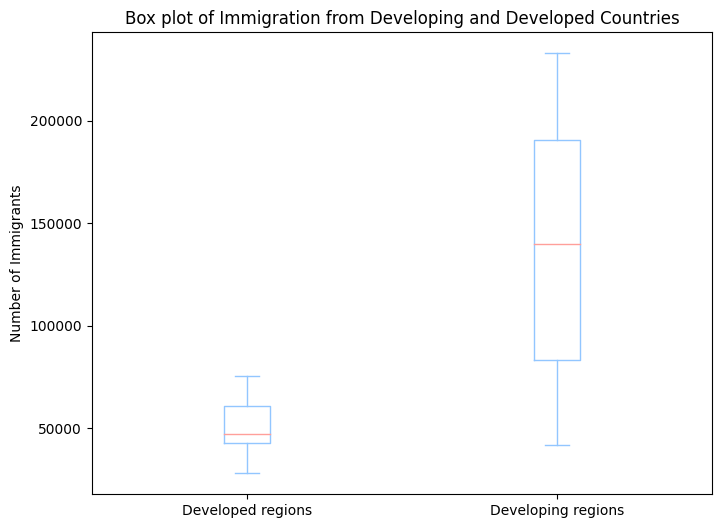

In [ ]:
df_devname.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Immigration from Developing and Developed Countries')
plt.ylabel('Number of Immigrants')


plt.show()


# What do you observe?

There are more immigrants coming from developing regions than developed regions. The median of the immigration from developing regions is higher than the median of the developed regions, by about a 100,000. In addition, the upper quartile 3 (Q3) and the lower quartile 1 (Q1) of the developing regions is higher than the Q1 and Q3 of the developed regions. The range of values is also much higher in developing regions than in developed regions. This means there is more variation of immigration from developing regions compared to developed regions. In addition, the developing regions has a much higher max of more than 200,000 in terms of the number of immigrants, while the developed regions max is less than 100,000. Thus, immigration from developing regions tend to be much higher, more varied, and reaching much higher numbers than from developed regions.

#Name: Abdulrahman Atoum
#NetID: AJA190007


# **Question 2: Plot a line graph of immigration from Haiti using dataframe called haiti**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:



Create a dataframe "haiti":

In [ ]:
#Since we converted the years to string,
#let's declare a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))
#creating data series
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

,Haiti
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


**Create a line chart with the following characteristics:**

a.  Plot title: Immigration from Haiti

b.  Label the x and y axes properly

c.  Create data label for the peak in data you see for year 2010. (Hint: use plt.text)**


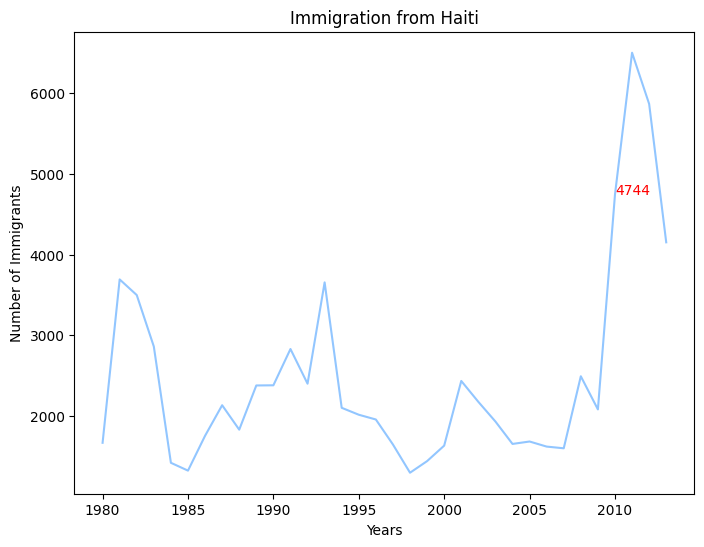

In [ ]:
haiti.index = haiti.index.astype(int)

haiti.plot(kind='line', figsize=(8, 6))

plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

number = haiti.loc[2010]
year = 2010
plt.text(year , number, number, color='red')

plt.show()

#Name: Abdulrahman Atoum
#NetID: AJA190007


# **Question 3: Plot a bar graph of immigration to canada by regions in the year 2013**

Create your dataframe for bar graph

In [ ]:
# group countries by regions and apply sum() function
df_regions = df_can.groupby('Region', axis=0).sum()

# note: the output of the groupby method is a `groupby' object.
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Region', axis=0)))

df_regions.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<ipython-input-14-1f9f451e2f14>:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_regions = df_can.groupby('Region', axis=0).sum()
<ipython-input-14-1f9f451e2f14>:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  print(type(df_can.groupby('Region', axis=0)))


,Type,Coverage,AREA,Continent,REG,DEV,DevName,1980,1981,1982,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Region,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,ImmigrantsImmigrants,ForeignersForeigners,1818,OceaniaOceania,1854,1802,Developed regionsDeveloped regions,1304,1119,848,...,1279,1193,1383,1498,1538,1423,1226,1399,1536,
Caribbean,ImmigrantsImmigrantsImmigrantsImmigrantsImmigr...,ForeignersForeignersForeignersForeignersForeig...,11752,Latin America and the CaribbeanLatin America a...,11895,11726,Developing regionsDeveloping regionsDeveloping...,7045,8310,8326,...,6816,6652,7826,8862,8847,10549,11958,11898,10393,
Central America,ImmigrantsImmigrantsImmigrantsImmigrantsImmigr...,ForeignersForeignersForeignersForeignersForeig...,7232,Latin America and the CaribbeanLatin America a...,7328,7216,Developing regionsDeveloping regionsDeveloping...,734,921,1612,...,3990,4140,5039,4891,4814,5692,5821,6019,5644,
Central Asia,ImmigrantsImmigrantsImmigrantsImmigrantsImmigr...,ForeignersForeignersForeignersForeignersForeig...,4675,AsiaAsiaAsiaAsiaAsia,27500,4510,Developing regionsDeveloping regionsDeveloping...,0,0,0,...,1134,903,936,805,962,905,769,1029,691,
Eastern Africa,ImmigrantsImmigrantsImmigrantsImmigrantsImmigr...,ForeignersForeignersForeignersForeignersForeig...,15351,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...,15470,15334,Developing regionsDeveloping regionsDeveloping...,1471,1641,1426,...,7083,6750,6669,6705,6922,8591,8956,8846,9448,


Create a dataframe for year 2013 and sorted values

In [ ]:
df_regions_2013 = df_regions['2013']
df_regions_2013=df_regions_2013.sort_values()

Create a Bar Graph

Hint: Use kind=barh

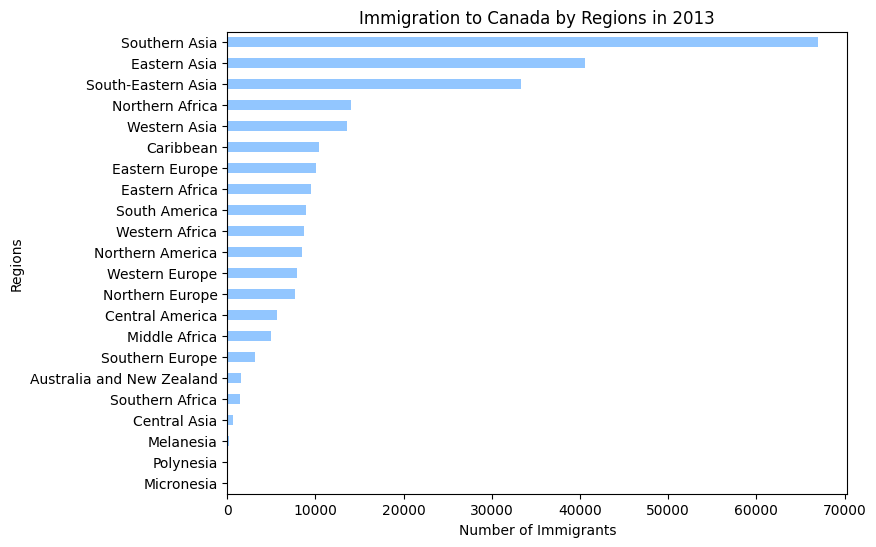

In [ ]:
#Write your code here
df_regions_2013.plot(kind='barh', figsize=(8, 6))

plt.title('Immigration to Canada by Regions in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Regions')

plt.show()

#Name:Abdulrahman Atoum
#NetID: AJA190007


# **Question 4: Create a pie chart to show immigration from countries in Caribbean in 2013**

Create a dataframe for pie chart

In [ ]:
df_caribbean = df_can[df_can["Region"] == "Caribbean"]
df_caribbean.shape

(13, 43)

Create a Pie chart with the following characteristics:

Add appropriate titles and data labels
add a legend to the upper left corner with fontsize=6
Explode the slices of the lowest 5 countries

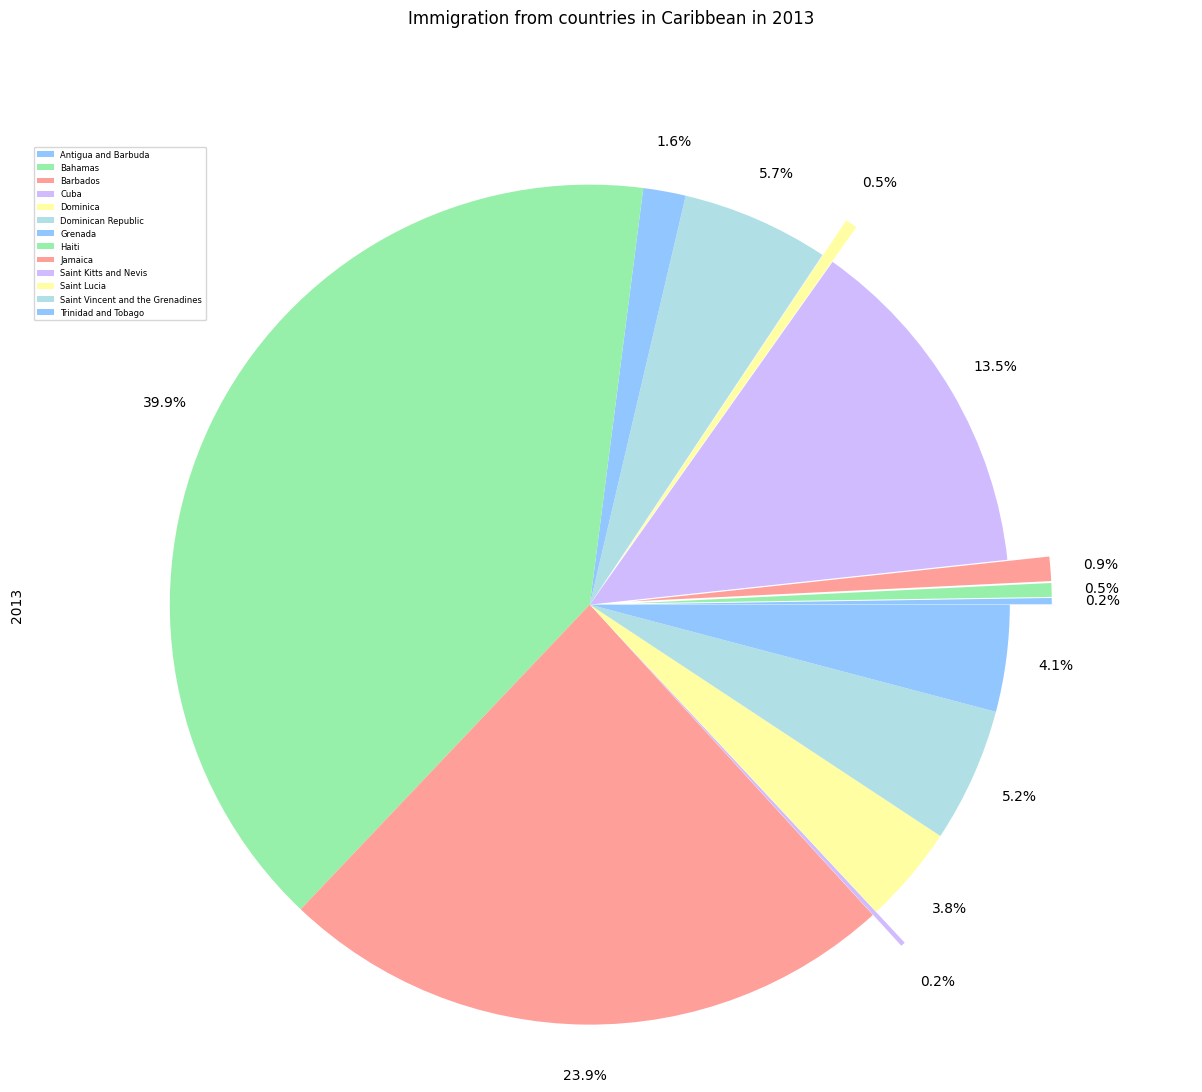

In [ ]:
num_explodes = 5  # Number of slices to explode
explode_value = 0.1  # The explode distance for the lowest values

# Get the index of the lowest 5 values
lowest_values_index = df_caribbean['2013'].nsmallest(num_explodes).index

# Initialize an empty explode list
explode_list = []

# Use a for loop to populate the explode list
for idx in df_caribbean.index:
    if idx in lowest_values_index:
        explode_list.append(explode_value)
    else:
        explode_list.append(0)

df_caribbean['2013'].plot(kind='pie',
                            figsize=(15,12),
                            autopct='%1.1f%%',
                            shadow=False,
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 5 countries
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration from countries in Caribbean in 2013', y=1.12)
plt.axis('equal')

# add legend
plt.legend(labels=df_caribbean.index, loc='upper left', fontsize=6)

 # show plot
plt.show()